# Handwritten digit recog

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

Loading the train, test data from keras

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

Checking the length of the loaded dataset

In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [36]:
print(X_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

Visualizing what is above using matplotlib

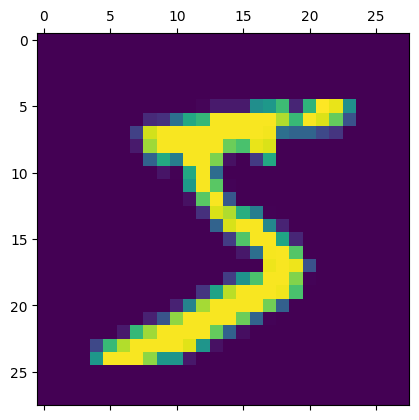

In [35]:
plt.matshow(X_train[0])

As we can see above image is hand written 5, lets Check

In [34]:
y_train[0]

5

Printing the first 5 elements of y_train

In [8]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

Now Since we know that the dataset is in 2D array we will flatter it into a 1D array using reshape function and will give every element as a input to the neurons.

In [9]:
X_train.shape

(60000, 28, 28)

Performing the below step so that all the values lies between 0 to 1

In [10]:
X_train = X_train/255
X_test = X_test/255

In [11]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

Now the X_train is converted from a 2d array to 1d array

In [12]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)
X_train_flattened.shape

(60000, 784)

Defining the Neural Networks using keras

Here 10 is the number of output layer we need && input_shape is number of input neuron

Dense is used for --> We want every input neuron to maped with every output neuron thus used Dense

model.compile as the name suggest compile the model 
model.fit is for fiting the data Note here we used the flattened train data 

In [13]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape = (784,), activation = 'sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(X_train_flattened, y_train, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 1s 426us/step - loss: 0.4707 - accuracy: 0.8773
Epoch 2/10
1875/1875 [==============================] - 1s 447us/step - loss: 0.3043 - accuracy: 0.9156
Epoch 3/10
1875/1875 [==============================] - 1s 420us/step - loss: 0.2832 - accuracy: 0.9204
Epoch 4/10
1875/1875 [==============================] - 1s 423us/step - loss: 0.2734 - accuracy: 0.9240
Epoch 5/10
1875/1875 [==============================] - 1s 420us/step - loss: 0.2663 - accuracy: 0.9257
Epoch 6/10
1875/1875 [==============================] - 1s 420us/step - loss: 0.2619 - accuracy: 0.9274
Epoch 7/10
1875/1875 [==============================] - 1s 419us/step - loss: 0.2586 - accuracy: 0.9284
Epoch 8/10
1875/1875 [==============================] - 1s 418us/step - loss: 0.2556 - accuracy: 0.9291
Epoch 9/10
1875/1875 [==============================] - 1s 448us/step - loss: 0.2528 - accuracy: 0.9299
Epoch 10/10
1875/1875 [==============================] - 1s 427u

Now Checking the Model performance 

Using the model.evaluate 

NOTE --> Accuracy is 92.81%

In [14]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 0s 404us/step - loss: 0.2683 - accuracy: 0.9241


[0.26829254627227783, 0.9240999817848206]

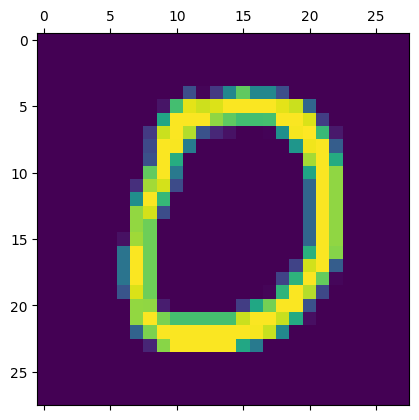

In [15]:
plt.matshow(X_test[10])

In [16]:
y_predicted = model.predict(X_test_flattened)

313/313 [==============================] - 0s 376us/step


In [17]:
print(y_predicted[10])

[9.9897909e-01 4.9254208e-08 3.9366105e-01 6.3168891e-02 4.4989090e-05
 8.0829853e-01 3.9000474e-02 4.2954816e-06 3.2641375e-01 5.7797495e-04]


Above cell is printing all the output, but we want only one which has the maximum value i.e that would be our answer

argmax is numpy function which gives the highest value among the given

In [18]:
np.argmax(y_predicted[10])

0

In [19]:
y_predicted[:5]

array([[4.24733292e-03, 1.70001577e-08, 1.88034754e-02, 9.76200640e-01,
        1.09048549e-03, 1.53343216e-01, 4.14991490e-08, 9.99881208e-01,
        7.28140995e-02, 7.21554697e-01],
       [3.50323409e-01, 6.85880007e-03, 9.99738276e-01, 1.81187138e-01,
        1.21147129e-11, 8.78820300e-01, 8.96829784e-01, 2.13558245e-15,
        6.46771640e-02, 2.68100147e-12],
       [1.26575935e-04, 9.94328678e-01, 6.53608263e-01, 2.48819992e-01,
        1.79170426e-02, 1.17334865e-01, 1.36184245e-01, 4.56035212e-02,
        2.91616887e-01, 2.19523385e-02],
       [9.99661982e-01, 1.32025146e-08, 9.37333182e-02, 4.31769248e-03,
        1.49190346e-05, 4.72574309e-02, 1.77167892e-01, 8.38411972e-03,
        7.42171379e-03, 1.25415251e-02],
       [5.51000983e-02, 1.36070976e-05, 1.37302473e-01, 2.77804513e-03,
        9.85738575e-01, 1.07547268e-02, 1.82748049e-01, 2.96314329e-01,
        1.90403089e-01, 7.39174843e-01]], dtype=float32)

Since we are getting all the output layers output

It basically showing the Probability of the given image to be 0,1,2,....9
But we dont want all the Probability we just want highest probability of the image what it is supposed to be by our model



In [20]:
y_predicted_label = [np.argmax(i) for i in y_predicted]
y_predicted_label[:5]

[7, 2, 1, 0, 4]

In [21]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [22]:
confusion_matrix = tf.math.confusion_matrix(labels = y_test, predictions = y_predicted_label)
confusion_matrix

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 960,    0,    2,    2,    0,    7,    6,    2,    1,    0],
       [   0, 1117,    3,    2,    0,    1,    4,    2,    6,    0],
       [   7,    9,  927,   20,    7,    3,   12,   11,   31,    5],
       [   2,    0,   14,  940,    0,   20,    2,   11,   14,    7],
       [   1,    1,    5,    2,  902,    0,   14,    9,   10,   38],
       [   9,    2,    2,   43,    6,  777,   17,    7,   24,    5],
       [  11,    3,    7,    2,    7,   12,  914,    1,    1,    0],
       [   1,    7,   21,    7,    3,    1,    0,  958,    3,   27],
       [   8,   13,    6,   44,    8,   37,   11,   13,  826,    8],
       [  11,    8,    1,   14,   17,    6,    0,   30,    2,  920]],
      dtype=int32)>

Text(70.72222222222221, 0.5, 'Truth')

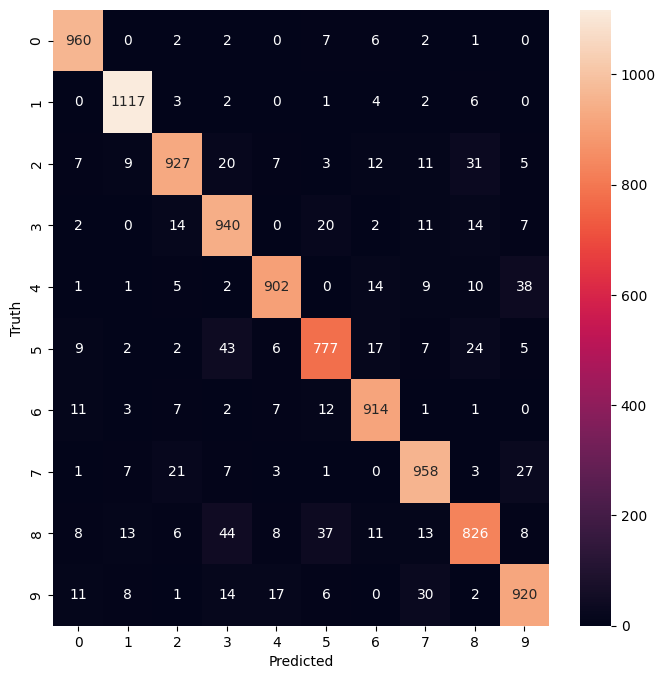

In [23]:
import seaborn as sn
plt.figure(figsize = (8,8))
sn.heatmap(confusion_matrix, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Now using the same Model but with 100 hidden layers in between

And using the activation relu
Note for Output layer we mostly use activation as sigmoid 

In [24]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape = (784,), activation = 'relu'),
    keras.layers.Dense(10,  activation = 'sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(X_train_flattened, y_train, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 1s 629us/step - loss: 0.2696 - accuracy: 0.9226
Epoch 2/10
1875/1875 [==============================] - 1s 644us/step - loss: 0.1209 - accuracy: 0.9653
Epoch 3/10
1875/1875 [==============================] - 1s 672us/step - loss: 0.0842 - accuracy: 0.9745
Epoch 4/10
1875/1875 [==============================] - 1s 651us/step - loss: 0.0637 - accuracy: 0.9807
Epoch 5/10
1875/1875 [==============================] - 1s 652us/step - loss: 0.0510 - accuracy: 0.9845
Epoch 6/10
1875/1875 [==============================] - 1s 602us/step - loss: 0.0403 - accuracy: 0.9870
Epoch 7/10
1875/1875 [==============================] - 1s 645us/step - loss: 0.0324 - accuracy: 0.9900
Epoch 8/10
1875/1875 [==============================] - 1s 649us/step - loss: 0.0263 - accuracy: 0.9922
Epoch 9/10
1875/1875 [==============================] - 1s 605us/step - loss: 0.0229 - accuracy: 0.9932
Epoch 10/10
1875/1875 [==============================] - 1s 603u

In [25]:
model.evaluate(X_test_flattened, y_test)
y_predicted = model.predict(X_test_flattened)

313/313 [==============================] - 0s 384us/step


In [26]:
y_predicted_label = [np.argmax(i) for i in y_predicted]
y_predicted_label[:5]

[7, 2, 1, 0, 4]

In [27]:
confusion_matrix = tf.math.confusion_matrix(labels = y_test, predictions = y_predicted_label)
confusion_matrix

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 961,    0,    7,    1,    2,    2,    2,    1,    3,    1],
       [   0, 1117,    7,    1,    1,    0,    2,    1,    5,    1],
       [   2,    0, 1014,    4,    1,    0,    1,    2,    7,    1],
       [   0,    0,    6,  993,    1,    3,    0,    3,    2,    2],
       [   0,    0,    6,    1,  959,    1,    1,    2,    1,   11],
       [   1,    1,    0,   23,    1,  856,    3,    3,    3,    1],
       [   3,    2,    2,    1,    5,    6,  937,    0,    2,    0],
       [   0,    1,    9,    6,    1,    0,    0, 1003,    2,    6],
       [   0,    0,    8,   16,    3,    3,    1,    2,  938,    3],
       [   0,    3,    1,    7,    5,    1,    0,    5,    1,  986]],
      dtype=int32)>

Text(70.72222222222221, 0.5, 'Truth')

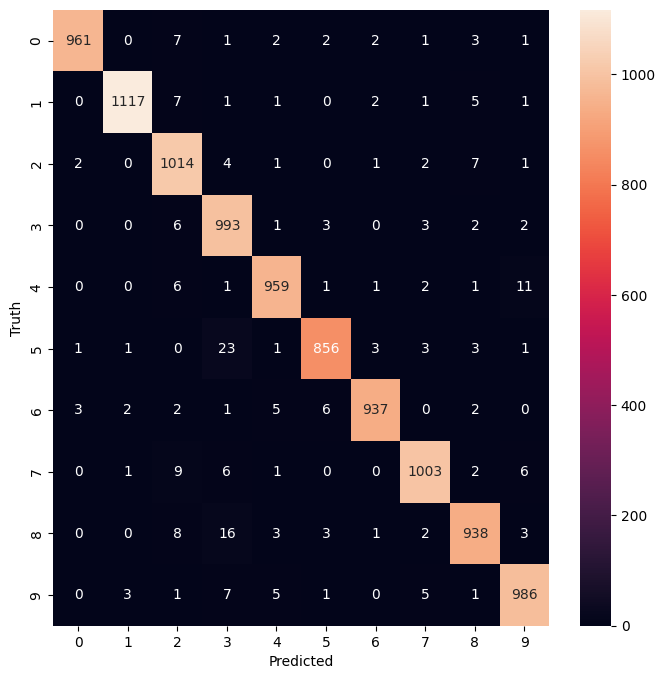

In [28]:
import seaborn as sn
plt.figure(figsize = (8,8))
sn.heatmap(confusion_matrix, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Now if we wish not to do flattened by ourself


We can use keras.layers.Flatten(input_shape = (28,28))

In [29]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(100, activation = 'relu'),
    keras.layers.Dense(10,  activation = 'sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(X_train, y_train, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 1s 614us/step - loss: 0.2696 - accuracy: 0.9234
Epoch 2/10
1875/1875 [==============================] - 1s 600us/step - loss: 0.1249 - accuracy: 0.9625
Epoch 3/10
1875/1875 [==============================] - 1s 609us/step - loss: 0.0871 - accuracy: 0.9740
Epoch 4/10
1875/1875 [==============================] - 1s 606us/step - loss: 0.0673 - accuracy: 0.9790
Epoch 5/10
1875/1875 [==============================] - 1s 620us/step - loss: 0.0519 - accuracy: 0.9841
Epoch 6/10
1875/1875 [==============================] - 1s 612us/step - loss: 0.0428 - accuracy: 0.9869
Epoch 7/10
1875/1875 [==============================] - 1s 626us/step - loss: 0.0347 - accuracy: 0.9896
Epoch 8/10
1875/1875 [==============================] - 1s 673us/step - loss: 0.0286 - accuracy: 0.9908
Epoch 9/10
1875/1875 [==============================] - 1s 661us/step - loss: 0.0238 - accuracy: 0.9926
Epoch 10/10
1875/1875 [==============================] - 1s 643u

In [37]:
model.evaluate(X_test, y_test)
y_predicted = model.predict(X_test)

313/313 [==============================] - 0s 387us/step


In [49]:
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(50, activation='relu'),  
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train, y_train, epochs=20)


Epoch 1/20
1875/1875 [==============================] - 1s 671us/step - loss: 0.2543 - accuracy: 0.9247
Epoch 2/20
1875/1875 [==============================] - 1s 667us/step - loss: 0.1100 - accuracy: 0.9668
Epoch 3/20
1875/1875 [==============================] - 1s 667us/step - loss: 0.0794 - accuracy: 0.9760
Epoch 4/20
1875/1875 [==============================] - 1s 720us/step - loss: 0.0614 - accuracy: 0.9809
Epoch 5/20
1875/1875 [==============================] - 1s 766us/step - loss: 0.0492 - accuracy: 0.9844
Epoch 6/20
1875/1875 [==============================] - 1s 663us/step - loss: 0.0406 - accuracy: 0.9864
Epoch 7/20
1875/1875 [==============================] - 1s 663us/step - loss: 0.0320 - accuracy: 0.9897
Epoch 8/20
1875/1875 [==============================] - 1s 663us/step - loss: 0.0290 - accuracy: 0.9906
Epoch 9/20
1875/1875 [==============================] - 1s 665us/step - loss: 0.0230 - accuracy: 0.9925
Epoch 10/20
1875/1875 [==============================] - 1s 667u